In [1]:
!git clone https://github.com/axelcarlier/projsemisup.git
path = "./projsemisup/"

Cloning into 'projsemisup'...
remote: Enumerating objects: 23846, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 23846 (delta 0), reused 2 (delta 0), pack-reused 23843
Receiving objects: 100% (23846/23846), 1.61 GiB | 26.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (12827/12827), done.


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, losses, metrics
import numpy as np 

# Jeu de données du projet

In [ ]:
import csv
CLASSES = []
with open(path + 'selected_classes.csv', newline='') as csvfile:
	filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
	for row in filereader:
		CLASSES.append(row[0])

print(len(CLASSES))

95


In [ ]:
IMAGE_SIZE = 64
BATCH_SIZE = 10
NB_CLASSES = 95

In [ ]:
import os
import PIL
from PIL import Image
import numpy as np

def load_semisup_data(path, classes, image_size=64):

  file_path_lab = os.listdir(path + 'Lab/')
  nb_lab = 475
  # Initialise les structures de données
  x_lab = np.zeros((nb_lab, image_size, image_size, 3))
  y_lab = np.zeros((nb_lab, 1))
  i = 0
  for c in file_path_lab:

    class_label = classes.index(c)
    list_images = os.listdir(path + 'Lab/' + c + '/')

    for img_name in list_images:
      # Lecture de l'image
      img = Image.open(path + 'Lab/' + c + '/' + img_name)
      # Mise à l'échelle de l'image
      img = img.resize((image_size,image_size), Image.ANTIALIAS)

      img = img.convert('RGB')
      # Remplissage de la variable x
      x_lab[i] = np.asarray(img)
      y_lab[i] = class_label
      i = i + 1


  file_path_test = os.listdir(path + 'Test/')
  nb_test = 2850
  # Initialise les structures de données
  x_test = np.zeros((nb_test, image_size, image_size, 3))
  y_test = np.zeros((nb_test, 1))
  i = 0
  for c in file_path_test:

    class_label = classes.index(c)
    list_images = os.listdir(path + 'Test/' + c + '/')

    for img_name in list_images:
      # Lecture de l'image
      img = Image.open(path + 'Test/' + c + '/' + img_name)
      # Mise à l'échelle de l'image
      img = img.resize((image_size,image_size), Image.ANTIALIAS)
      img = img.convert('RGB')
      # Remplissage de la variable x
      x_test[i] = np.asarray(img)
      y_test[i] = class_label
      i = i + 1



  file_path_unlab = os.listdir(path + 'Unlab/')
  nb_unlab = 9500
  # Initialise les structures de données
  x_unlab = np.zeros((nb_unlab, image_size, image_size, 3))

  i = 0
  for img_name in file_path_unlab:
    # Lecture de l'image
    img = Image.open(path + 'Unlab/' + img_name)
    # Mise à l'échelle de l'image
    img = img.resize((image_size,image_size), Image.ANTIALIAS)
    img = img.convert('RGB')
    # Remplissage de la variable x
    x_unlab[i] = np.asarray(img)
    i = i + 1

  return x_lab, y_lab, x_unlab, x_test, y_test

x_train_lab, y_train_lab, x_train_unlab, x_test, y_test = load_semisup_data(path, CLASSES)

In [ ]:
print(x_train_lab.shape, y_train_lab.shape)
print(x_test.shape, y_test.shape)
print(x_train_unlab.shape)

(475, 64, 64, 3) (475, 1)
(2850, 64, 64, 3) (2850, 1)
(9500, 64, 64, 3)


# Jeu de données Cifar-10

In [3]:
import random
from tensorflow.keras.datasets.cifar10 import load_data
(x_train_c, y_train_c), (x_test, y_test) = load_data()
percentage = 0.95
size = len(x_train_c)

list_index = np.arange(0,size,1)
index = np.sort(random.sample(list(list_index),int(size*percentage)))
2
counter_index = np.delete(list_index,index)

x_train_lab = x_train_c[counter_index]
y_train_lab = y_train_c[counter_index]
x_train_unlab = x_train_c[index]
print(x_train_lab.shape,y_train_lab.shape,x_train_unlab.shape,x_test.shape,y_test.shape)
# print(type(x_lab_c),type(y_lab_c),type(x_unlab_c),type(x_test_c),type(y_test_c))

170508288/170498071 [==============================] - 2s 0us/step
(2500, 32, 32, 3) (2500, 1) (47500, 32, 32, 3) (10000, 32, 32, 3) (10000, 1)


In [4]:
IMAGE_SIZE=32
BATCH_SIZE = 10
NB_CLASSES = 10

# Entrainement des données supervisées 

In [5]:
import matplotlib.pyplot as plt

def plot_training_analysis():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model_sup = Sequential()

model_sup.add(Conv2D(64,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model_sup.add(MaxPooling2D(pool_size=(2,2)))
model_sup.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_sup.add(MaxPooling2D(pool_size=(2,2)))
model_sup.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_sup.add(MaxPooling2D(pool_size=(2,2)))
model_sup.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_sup.add(MaxPooling2D(pool_size=(2,2)))
model_sup.add(Flatten())
model_sup.add(Dense(512,activation='relu'))
model_sup.add(Dense(NB_CLASSES,activation='softmax'))

model_sup.summary()

model_sup.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])
history = model_sup.fit(x_train_lab, y_train_lab, validation_data=(x_test, y_test), epochs=30, batch_size=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

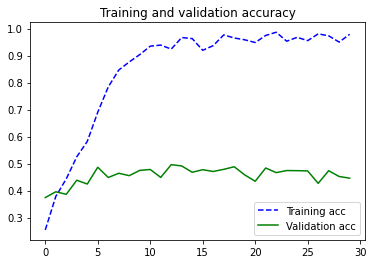

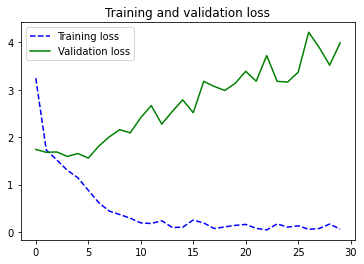

In [7]:
plot_training_analysis()

In [8]:
model_sup.evaluate(x_test, y_test, batch_size = 10)

1000/1000 [==============================] - 3s 3ms/step - loss: 3.9862 - sparse_categorical_accuracy: 0.4460


[3.986213207244873, 0.44600000977516174]

# Augmentation de données forte : AutoAugment

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random 

import random
import numpy as np
import scipy
from scipy import ndimage
from PIL import Image, ImageEnhance, ImageOps


operations = {
    'ShearX': lambda img, magnitude: shear_x(img, magnitude),
    'ShearY': lambda img, magnitude: shear_y(img, magnitude),
    'TranslateX': lambda img, magnitude: translate_x(img, magnitude),
    'TranslateY': lambda img, magnitude: translate_y(img, magnitude),
    'Rotate': lambda img, magnitude: rotate(img, magnitude),
    'AutoContrast': lambda img, magnitude: auto_contrast(img, magnitude),
    'Invert': lambda img, magnitude: invert(img, magnitude),
    'Equalize': lambda img, magnitude: equalize(img, magnitude),
    'Solarize': lambda img, magnitude: solarize(img, magnitude),
    'Posterize': lambda img, magnitude: posterize(img, magnitude),
    'Contrast': lambda img, magnitude: contrast(img, magnitude),
    'Color': lambda img, magnitude: color(img, magnitude),
    'Brightness': lambda img, magnitude: brightness(img, magnitude),
    'Sharpness': lambda img, magnitude: sharpness(img, magnitude),
    'Cutout': lambda img, magnitude: cutout(img, magnitude),
}


def apply_policy(img, policy):
    if random.random() < policy[1]:
        img = operations[policy[0]](img, policy[2])
    if random.random() < policy[4]:
        img = operations[policy[3]](img, policy[5])
    return img


def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = offset_matrix @ matrix @ reset_matrix
    return transform_matrix


def shear_x(img, magnitude):
    magnitudes = np.linspace(-0.3, 0.3, 11)

    transform_matrix = np.array([[1, random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]), 0],
                                 [0, 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def shear_y(img, magnitude):
    magnitudes = np.linspace(-0.3, 0.3, 11)

    transform_matrix = np.array([[1, 0, 0],
                                 [random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]), 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def translate_x(img, magnitude):
    magnitudes = np.linspace(-150/331, 150/331, 11)

    transform_matrix = np.array([[1, 0, 0],
                                 [0, 1, img.shape[1]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def translate_y(img, magnitude):
    magnitudes = np.linspace(-150/331, 150/331, 11)

    transform_matrix = np.array([[1, 0, img.shape[0]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])],
                                 [0, 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def rotate(img, magnitude):
    magnitudes = np.linspace(-30, 30, 11)

    theta = np.deg2rad(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    transform_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                 [np.sin(theta), np.cos(theta), 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def auto_contrast(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.autocontrast(img)
    img = np.array(img)
    return img


def invert(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.invert(img)
    img = np.array(img)
    return img


def equalize(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.equalize(img)
    img = np.array(img)
    return img


def solarize(img, magnitude):
    magnitudes = np.linspace(0, 256, 11)

    img = Image.fromarray(img)
    img = ImageOps.solarize(img, random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def posterize(img, magnitude):
    magnitudes = np.linspace(4, 8, 11)

    img = Image.fromarray(img)
    img = ImageOps.posterize(img, int(round(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))))
    img = np.array(img)
    return img


def contrast(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Contrast(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def color(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Color(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def brightness(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Brightness(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def sharpness(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Sharpness(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def cutout(org_img, magnitude=None):
    magnitudes = np.linspace(0, 60/331, 11)

    img = np.copy(org_img)
    mask_val = img.mean()

    if magnitude is None:
        mask_size = 16
    else:
        mask_size = int(round(img.shape[0]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])))
    top = np.random.randint(0 - mask_size//2, img.shape[0] - mask_size)
    left = np.random.randint(0 - mask_size//2, img.shape[1] - mask_size)
    bottom = top + mask_size
    right = left + mask_size

    if top < 0:
        top = 0
    if left < 0:
        left = 0

    img[top:bottom, left:right, :].fill(mask_val)

    return img

class ProjectImageDataGenerator_:
    def __init__(self):
        self.datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, fill_mode='constant', cval=0, horizontal_flip=True)

        self.means = np.array([0.4914009 , 0.48215896, 0.4465308])
        self.stds = np.array([0.24703279, 0.24348423, 0.26158753])

        self.policies = [
            ['Invert', 0.1, 7, 'Contrast', 0.2, 6],
            ['Rotate', 0.7, 2, 'TranslateX', 0.3, 9],
            ['Sharpness', 0.8, 1, 'Sharpness', 0.9, 3],
            ['ShearY', 0.5, 8, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.5, 8, 'Equalize', 0.9, 2],
            ['ShearY', 0.2, 7, 'Posterize', 0.3, 7],
            ['Color', 0.4, 3, 'Brightness', 0.6, 7],
            ['Sharpness', 0.3, 9, 'Brightness', 0.7, 9],
            ['Equalize', 0.6, 5, 'Equalize', 0.5, 1],
            ['Contrast', 0.6, 7, 'Sharpness', 0.6, 5],
            ['Color', 0.7, 7, 'TranslateX', 0.5, 8],
            ['Equalize', 0.3, 7, 'AutoContrast', 0.4, 8],
            ['TranslateY', 0.4, 3, 'Sharpness', 0.2, 6],
            ['Brightness', 0.9, 6, 'Color', 0.2, 8],
            ['Solarize', 0.5, 2, 'Invert', 0, 0.3],
            ['Equalize', 0.2, 0, 'AutoContrast', 0.6, 0],
            ['Equalize', 0.2, 8, 'Equalize', 0.6, 4],
            ['Color', 0.9, 9, 'Equalize', 0.6, 6],
            ['AutoContrast', 0.8, 4, 'Solarize', 0.2, 8],
            ['Brightness', 0.1, 3, 'Color', 0.7, 0],
            ['Solarize', 0.4, 5, 'AutoContrast', 0.9, 3],
            ['TranslateY', 0.9, 9, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.9, 2, 'Solarize', 0.8, 3],
            ['Equalize', 0.8, 8, 'Invert', 0.1, 3],
            ['TranslateY', 0.7, 9, 'AutoContrast', 0.9, 1],
        ]

    def standardize(self, x):
        x = x.astype('float32') / 255

        means = self.means.reshape(1, 1, 1, 3)
        stds = self.stds.reshape(1, 1, 1, 3)

        x -= means
        x /= (stds + 1e-6)

 
    def flow(self, x, y=None, batch_size=BATCH_SIZE, shuffle=True, sample_weight=None,
             seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None):
        batches = self.datagen.flow(x, y, batch_size, shuffle, sample_weight,
                               seed, save_to_dir, save_prefix, save_format, subset)

        while True:
            x_batch = next(batches)

            x_batch = x_batch.astype('uint8')
            rand_element = 1.
            for i in range(x_batch.shape[0]):
                rand_tirage = random.random()
                if rand_tirage <= rand_element : 
                  x_batch[i] = apply_policy(x_batch[i], self.policies[random.randrange(len(self.policies))])                  

            #x_batch = self.standardize(x_batch)

            return x_batch


# FixMatch

In [10]:
x_test = x_test/255 # a faire une fois 

In [11]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers, models


# définition du modèle 
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(NB_CLASSES,activation='softmax'))

model.summary()

    
#lambda = 
#| 0 si epoch < 20
#| (epoch-20) * 1/20 si 20 <= epoch < 40
#| 1 sinon
def lambda_reg(t):
    if (t<20):
        res = 0
    elif (t<60):
        res = (t-20)*1/40
    else:
        res = 1
    return res

#lambda = exp(epoch.nb_epochs)
def lam(t, T):
  return tf.math.exp(t/(2*(T-1)))

#lambda = cste
def lambda_cste(cste):
  return cste

def weak_augmentation(batch_images):
  datagen = ImageDataGenerator(
    #rotation_range=12.5,
    width_shift_range=0.125,
    height_shift_range=0.125,
    horizontal_flip=True,
    vertical_flip=False)
  augmented_batch = datagen.flow(batch_images,shuffle=False, batch_size=batch_size_unlab).next()
  return augmented_batch

# Augmentation de données strong 
def strong_augmentation(batch_images):
    datagen_strong = ProjectImageDataGenerator_()
    batch_images = datagen_strong.flow(batch_images, batch_size=batch_size_unlab)
    return batch_images


# Hyperparamètres de l'apprentissage
epochs = 80
batch_size = 30
batch_size_unlab = batch_size*5
if batch_size < x_train_lab.shape[0]:
  steps_per_epoch = math.floor(x_train_lab.shape[0]/batch_size)
else:
  steps_per_epoch = 1
  batch_size = x_train_lab.shape[0]
    

# Instanciation d'un optimiseur et d'une fonction de coût.
optimizer = optimizers.Adam(learning_rate=3e-4)
lr_cosine = tf.keras.experimental.CosineDecay(initial_learning_rate=3e-4, decay_steps=100)
optimizer_sgd = optimizers.SGD(learning_rate=3e-4, momentum=0.5)
loss_fn = losses.SparseCategoricalCrossentropy()
loss_fn2 = losses.CategoricalCrossentropy()

# Préparation des métriques pour le suivi de la performance du modèle.
train_acc_metric = metrics.SparseCategoricalAccuracy()
test_acc_metric = metrics.SparseCategoricalAccuracy()

# Indices de l'ensemble labellisé
indices = np.arange(x_train_lab.shape[0])
indices_unlab = np.arange(x_train_unlab.shape[0])

# Stockage des loss et du nombre de labels 
train_acc_list = []
unsup_loss_list = []
sup_loss_list = []
val_acc = []
nb_pseudo_labels_list = []

# Boucle sur les epochs
for epoch in range(epochs):

  # A chaque nouvelle epoch, on randomise les indices de l'ensemble labellisé
  np.random.shuffle(indices) 
  np.random.shuffle(indices_unlab) 

  # Et on recommence à cumuler la loss
  cum_loss_value = 0
  cum_sup_loss = 0
  cum_unsup_loss = 0

  #on compte le nombre de pseudo labels 
  nb_pseudo_labels = 0 
  for step in range(steps_per_epoch):

    # Sélection des données du prochain batch
    x_batch = x_train_lab[indices[step*batch_size: (step+1)*batch_size]].astype(float)
    y_batch = y_train_lab[indices[step*batch_size: (step+1)*batch_size]]
    x_batch_unlab = x_train_unlab[indices_unlab[step*batch_size_unlab: (step+1)*batch_size_unlab]].astype(float)
    x_batch /= 255
    x_batch_unlab /= 255
    x_batch_unlab_weak = weak_augmentation(x_batch_unlab.copy())  
    x_batch_unlab_strong = strong_augmentation(x_batch_unlab.copy())

    # Etape nécessaire pour comparer y_batch à la sortie du réseau
    y_batch = np.expand_dims(y_batch, 1)

    # Les opérations effectuées par le modèle dans ce bloc sont suivies et permettront
    # la différentiation automatique.
    with tf.GradientTape() as tape:

      # Application du réseau aux données d'entrée
      y_pred = model(x_batch, training=True)  
      # print("ypred", y_pred)
      sup_term = loss_fn(y_batch, y_pred)

      # Algorithme fixmatch 
      y_pred_unlab_weak = model(x_batch_unlab_weak, training=True) 
      # if step == 0:
      # plt.imshow((x_batch_unlab_weak[0]))
      # plt.show()
      # plt.imshow((x_batch[0]))
      # plt.show()
      y_pred_unlab_strong = model(x_batch_unlab_strong, training=True)
      # print("batch weak", type(x_batch_unlab_weak))


      # Enleve les images dont la probabilité prédite avec la weak augmentation n'atteint pas le threshold
      threshold = 0.9
      # print(tf.reduce_max(y_pred_unlab_weak))
      max_indices = tf.math.argmax(y_pred_unlab_weak, axis=1)
      indices_images_threshold = []
      for i, image in enumerate(y_pred_unlab_weak):
        if image[max_indices[i]] >= threshold :
          indices_images_threshold.append(i)
      # print(len(indices_images_threshold))
      # Si au moins une classe est prédite au dessus du threshold 
      if indices_images_threshold != [] : 
        t_w = [tf.unstack(y_pred_unlab_weak[indices_images_threshold[0]])]
        t_s = [tf.unstack(y_pred_unlab_strong[indices_images_threshold[0]])]
        for indice in indices_images_threshold[1:]:
          t_w.append(tf.unstack(y_pred_unlab_weak[indice]))
          t_s.append(tf.unstack(y_pred_unlab_strong[indice]))
        y_pred_unlab_weak = tf.stack(t_w)
        y_pred_unlab_strong = tf.stack(t_s)
        # print("nb images threshold", len(indices_images_threshold))
        # Récupère les indices des classes les plus probables des images restantes
        new_max_indices = tf.math.argmax(y_pred_unlab_weak, axis = 1)
        size_images = y_pred_unlab_strong.shape[1]

        # Transforme le tenseur avec toutes les images restantes du batch en one hot 
        pseudo_label = tf.one_hot(new_max_indices, size_images, on_value=1.0, off_value=0.0, axis=-1)
        # unsup_term = lam(epoch, epochs) * loss_fn2(pseudo_label, y_pred_unlab_strong)
        # unsup_term = lambda_reg(epoch) * loss_fn2(pseudo_label, y_pred_unlab_strong)
        unsup_term = lambda_cste(1) * loss_fn2(pseudo_label, y_pred_unlab_strong)
        # unsup_term =  loss_fn2(pseudo_label, y_pred_unlab_strong)

      else : 
        t_w = [0.]
        t_s = [0.]
        y_pred_unlab_weak = tf.stack(t_w)
        y_pred_unlab_strong = tf.stack(t_s)
        pseudo_label = tf.stack([0.])
        unsup_term = 0

      # Calcul de la fonction de perte sur ce batch
      #loss_value = loss_fn(y_batch, y_pred) + lambda_reg(epoch) * entropy_loss(y_pred_unlab)
      # print("ok",pseudo_label, y_pred_unlab_strong, indices_images_threshold)
      loss_value =  sup_term + unsup_term 
      # print(unsup_term, pseudo_label, y_pred_unlab_strong)

      # print("sup : ",sup_term)
      # print("unsup :", unsup_term, lam(epoch, epochs))

      # Calcul des gradients par différentiation automatique
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Réalisation d'une itération de la descente de gradient (mise à jour des paramètres du réseau)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Mise à jour de la métrique
      train_acc_metric.update_state(y_batch, y_pred)

      cum_loss_value = cum_loss_value + loss_value
      cum_sup_loss += sup_term
      cum_unsup_loss += unsup_term 
      nb_pseudo_labels += len(indices_images_threshold)

  # Calcul de la précision à la fin de l'epoch
  train_acc = train_acc_metric.result()

  # Calcul de la précision sur l'ensemble de test à la fin de l'epoch
  test_logits = model(x_test, training=False)
  test_acc_metric.update_state(np.expand_dims(y_test, 1), test_logits)
  test_acc = test_acc_metric.result()

  print("Epoch %4d : Loss : %.4f, Acc : %.4f, Test Acc : %.4f" % (epoch, float(cum_loss_value/steps_per_epoch), float(train_acc), float(test_acc)))
  print("nb pseudo_labels ", nb_pseudo_labels)
  train_acc_list.append(train_acc)
  unsup_loss_list.append(float(cum_unsup_loss/steps_per_epoch))
  sup_loss_list.append(float(cum_sup_loss/steps_per_epoch))
  val_acc.append(float(test_acc))
  nb_pseudo_labels_list.append(nb_pseudo_labels)

  # Remise à zéro des métriques pour la prochaine epoch
  train_acc_metric.reset_states()
  test_acc_metric.reset_states()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

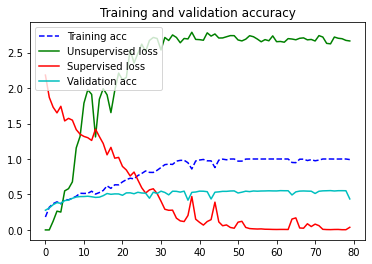

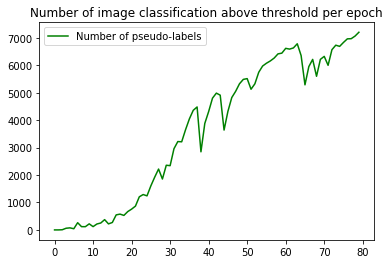

In [12]:
plt.figure()
epochs = range(80)

plt.plot(epochs, train_acc_list, 'b', linestyle="--",label='Training acc')
plt.plot(epochs, unsup_loss_list, 'g', label='Unsupervised loss')
plt.plot(epochs, sup_loss_list, 'r', label='Supervised loss')
plt.plot(epochs, val_acc, 'c', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, nb_pseudo_labels_list, 'g', label = 'Number of pseudo-labels')
plt.legend()
plt.title('Number of image classification above threshold per epoch')
plt.show()

In [ ]:
model.evaluate(x_test, y_test, batch_size = 30)